In [68]:
import pandas as pd
import numpy as np

In [69]:
df = pd.read_csv("vid18_180219.dat",delimiter=',')
df.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [70]:
# Para usar solamente las categorias de TIMESTAMP y AirTC_Avg, se modifica el dataframe
df = pd.DataFrame({"TIME" : df.TIMESTAMP,"AirAvg" : df.AirTC_Avg})

df.head()

,TIME,AirAvg
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [71]:
df.dtypes

TIME       object
AirAvg    float64
dtype: object

In [72]:
# Como no queremos al tiempo como objeto, sino con un formato de fecha
df["TIME"] = pd.to_datetime(df.apply(lambda x: x['TIME'], 1))

In [73]:
# Se construye la tabla a partir del 1 de Noviembre del 2018
df =df[(df["TIME"] > "2018-11-1")]
df.head()

,TIME,AirAvg
24936,2018-11-01 00:10:00,8.89
24937,2018-11-01 00:20:00,8.66
24938,2018-11-01 00:30:00,8.52
24939,2018-11-01 00:40:00,8.47
24940,2018-11-01 00:50:00,8.58


In [74]:
# Se agregan las columnas de temperaturas máximas y mínimas
# Pero primero se separa el tiempo en año, mes, día y horas.
df["AÑO"] = df["TIME"].dt.year
df["MES"] = df["TIME"].dt.month
df['DIA'] = df['TIME'].dt.day
df['HORA'] = df['TIME'].dt.hour

In [75]:
df["TEMPP"]=df.groupby(["AÑO","MES","DIA","HORA"])["AirAvg"].transform("mean")
df.head()

,TIME,AirAvg,AÑO,MES,DIA,HORA,TEMPP
24936,2018-11-01 00:10:00,8.89,2018,11,1,0,8.624
24937,2018-11-01 00:20:00,8.66,2018,11,1,0,8.624
24938,2018-11-01 00:30:00,8.52,2018,11,1,0,8.624
24939,2018-11-01 00:40:00,8.47,2018,11,1,0,8.624
24940,2018-11-01 00:50:00,8.58,2018,11,1,0,8.624


In [76]:
# Se eliminan las columnas que ya no se usan AirAvg
df = df.drop('AirAvg', 1)
df.head()

,TIME,AÑO,MES,DIA,HORA,TEMPP
24936,2018-11-01 00:10:00,2018,11,1,0,8.624
24937,2018-11-01 00:20:00,2018,11,1,0,8.624
24938,2018-11-01 00:30:00,2018,11,1,0,8.624
24939,2018-11-01 00:40:00,2018,11,1,0,8.624
24940,2018-11-01 00:50:00,2018,11,1,0,8.624


In [77]:
# agregando TMAX y TMIN
df["TMIN"] = np.round(df.groupby(["AÑO","MES","DIA"])["TEMPP"].transform("min"), decimals = 2)
df["TMAX"] = np.round(df.groupby(["AÑO","MES","DIA"])["TEMPP"].transform("max"), decimals = 2)
df.head(30)

,TIME,AÑO,MES,DIA,HORA,TEMPP,TMIN,TMAX
24936,2018-11-01 00:10:00,2018,11,1,0,8.624000,6.81,28.62
24937,2018-11-01 00:20:00,2018,11,1,0,8.624000,6.81,28.62
24938,2018-11-01 00:30:00,2018,11,1,0,8.624000,6.81,28.62
24939,2018-11-01 00:40:00,2018,11,1,0,8.624000,6.81,28.62
24940,2018-11-01 00:50:00,2018,11,1,0,8.624000,6.81,28.62
24941,2018-11-01 01:00:00,2018,11,1,1,8.493333,6.81,28.62
24942,2018-11-01 01:10:00,2018,11,1,1,8.493333,6.81,28.62
24943,2018-11-01 01:20:00,2018,11,1,1,8.493333,6.81,28.62
24944,2018-11-01 01:30:00,2018,11,1,1,8.493333,6.81,28.62
24945,2018-11-01 01:40:00,2018,11,1,1,8.493333,6.81,28.62


In [93]:
# Como se observan datos duplicados, se utiliza una función para eliminarlos
df=df.drop_duplicates()
f=len(df)
df.index = np.arange(0,f)
df.head()

,TIME,AÑO,MES,DIA,HORA,TEMPP,TMIN,TMAX,ModeloUR,Acumulado
0,2018-11-01 00:10:00,2018,11,1,0,8.624,6.81,28.62,1.0,1.0
1,2018-11-01 00:20:00,2018,11,1,0,8.624,6.81,28.62,1.0,2.0
2,2018-11-01 00:30:00,2018,11,1,0,8.624,6.81,28.62,1.0,3.0
3,2018-11-01 00:40:00,2018,11,1,0,8.624,6.81,28.62,1.0,4.0
4,2018-11-01 00:50:00,2018,11,1,0,8.624,6.81,28.62,1.0,5.0


In [79]:
# Utilizando el modelo Utah de Richardson
URichardson = []
for i in range(0, len(df)):
    temp = df.TEMPP[i]
    if (temp <= 1.4):
        temp = 0
        URichardson.append(temp)
    if (1.4 < temp <= 2.4):
        temp = 0.5
        URichardson.append(temp)
    if (2.4 < temp and temp <= 9.1):
        temp = 1.0
        URichardson.append(temp)
    if (9.1 < temp and temp <= 12.4):
        temp = 0.5
        URichardson.append(temp)
    if (12.4 < temp and temp <= 15.9):
        temp = 0
        URichardson.append(temp)
    if (15.9 < temp and temp <= 18.0):
        temp = -0.5
        URichardson.append(temp)
    if (18.0 < temp):
        temp = -1.0
        URichardson.append(temp)
        

In [80]:
# Para agregar los resultados del modelo
df['ModeloUR'] = URichardson 

In [81]:
df.head(50)

,TIME,AÑO,MES,DIA,HORA,TEMPP,TMIN,TMAX,ModeloUR
0,2018-11-01 00:10:00,2018,11,1,0,8.624000,6.81,28.62,1.0
1,2018-11-01 00:20:00,2018,11,1,0,8.624000,6.81,28.62,1.0
2,2018-11-01 00:30:00,2018,11,1,0,8.624000,6.81,28.62,1.0
3,2018-11-01 00:40:00,2018,11,1,0,8.624000,6.81,28.62,1.0
4,2018-11-01 00:50:00,2018,11,1,0,8.624000,6.81,28.62,1.0
5,2018-11-01 01:00:00,2018,11,1,1,8.493333,6.81,28.62,1.0
6,2018-11-01 01:10:00,2018,11,1,1,8.493333,6.81,28.62,1.0
7,2018-11-01 01:20:00,2018,11,1,1,8.493333,6.81,28.62,1.0
8,2018-11-01 01:30:00,2018,11,1,1,8.493333,6.81,28.62,1.0
9,2018-11-01 01:40:00,2018,11,1,1,8.493333,6.81,28.62,1.0


In [82]:
df.tail(20)

,TIME,AÑO,MES,DIA,HORA,TEMPP,TMIN,TMAX,ModeloUR
15704,2019-02-18 04:20:00,2019,2,18,4,4.739833,3.42,6.76,1.0
15705,2019-02-18 04:30:00,2019,2,18,4,4.739833,3.42,6.76,1.0
15706,2019-02-18 04:40:00,2019,2,18,4,4.739833,3.42,6.76,1.0
15707,2019-02-18 04:50:00,2019,2,18,4,4.739833,3.42,6.76,1.0
15708,2019-02-18 05:00:00,2019,2,18,5,4.157333,3.42,6.76,1.0
15709,2019-02-18 05:10:00,2019,2,18,5,4.157333,3.42,6.76,1.0
15710,2019-02-18 05:20:00,2019,2,18,5,4.157333,3.42,6.76,1.0
15711,2019-02-18 05:30:00,2019,2,18,5,4.157333,3.42,6.76,1.0
15712,2019-02-18 05:40:00,2019,2,18,5,4.157333,3.42,6.76,1.0
15713,2019-02-18 05:50:00,2019,2,18,5,4.157333,3.42,6.76,1.0


In [83]:
import matplotlib.pyplot as plt

In [84]:
df.head()

,TIME,AÑO,MES,DIA,HORA,TEMPP,TMIN,TMAX,ModeloUR
0,2018-11-01 00:10:00,2018,11,1,0,8.624,6.81,28.62,1.0
1,2018-11-01 00:20:00,2018,11,1,0,8.624,6.81,28.62,1.0
2,2018-11-01 00:30:00,2018,11,1,0,8.624,6.81,28.62,1.0
3,2018-11-01 00:40:00,2018,11,1,0,8.624,6.81,28.62,1.0
4,2018-11-01 00:50:00,2018,11,1,0,8.624,6.81,28.62,1.0


In [85]:
df.dtypes

TIME        datetime64[ns]
AÑO                  int64
MES                  int64
DIA                  int64
HORA                 int64
TEMPP              float64
TMIN               float64
TMAX               float64
ModeloUR           float64
dtype: object

In [86]:
# Para poder graficar
y1 = [df['TMAX'][i] for i in range(0,len(df))]
y2 = [df['TMIN'][i] for i in range(0,len(df))]
x1 = df.TIME

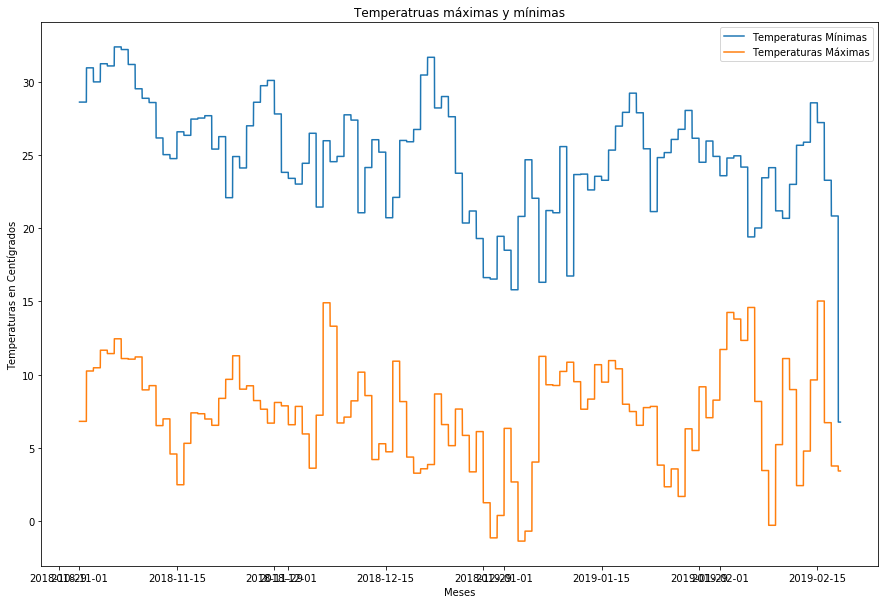

In [87]:
plt.figure(figsize=(15,10))

plt.plot(x1, y1, label='Temperaturas Mínimas')
plt.plot(x1, y2, label='Temperaturas Máximas')


plt.xlabel('Meses')
plt.ylabel('Temperaturas en Centígrados')

plt.title("Temperatruas máximas y mínimas")

plt.legend()

plt.show()

In [88]:
df.head()

,TIME,AÑO,MES,DIA,HORA,TEMPP,TMIN,TMAX,ModeloUR
0,2018-11-01 00:10:00,2018,11,1,0,8.624,6.81,28.62,1.0
1,2018-11-01 00:20:00,2018,11,1,0,8.624,6.81,28.62,1.0
2,2018-11-01 00:30:00,2018,11,1,0,8.624,6.81,28.62,1.0
3,2018-11-01 00:40:00,2018,11,1,0,8.624,6.81,28.62,1.0
4,2018-11-01 00:50:00,2018,11,1,0,8.624,6.81,28.62,1.0


In [89]:
acumulado = []
total = 0.0
for i in range(0, len(df)):
    total = total + df.ModeloUR[i]
    acumulado.append(total)

In [90]:
df['Acumulado'] = acumulado

In [91]:
df.tail(30)

,TIME,AÑO,MES,DIA,HORA,TEMPP,TMIN,TMAX,ModeloUR,Acumulado
15694,2019-02-18 02:40:00,2019,2,18,2,5.617833,3.42,6.76,1.0,-1791.5
15695,2019-02-18 02:50:00,2019,2,18,2,5.617833,3.42,6.76,1.0,-1790.5
15696,2019-02-18 03:00:00,2019,2,18,3,5.426667,3.42,6.76,1.0,-1789.5
15697,2019-02-18 03:10:00,2019,2,18,3,5.426667,3.42,6.76,1.0,-1788.5
15698,2019-02-18 03:20:00,2019,2,18,3,5.426667,3.42,6.76,1.0,-1787.5
15699,2019-02-18 03:30:00,2019,2,18,3,5.426667,3.42,6.76,1.0,-1786.5
15700,2019-02-18 03:40:00,2019,2,18,3,5.426667,3.42,6.76,1.0,-1785.5
15701,2019-02-18 03:50:00,2019,2,18,3,5.426667,3.42,6.76,1.0,-1784.5
15702,2019-02-18 04:00:00,2019,2,18,4,4.739833,3.42,6.76,1.0,-1783.5
15703,2019-02-18 04:10:00,2019,2,18,4,4.739833,3.42,6.76,1.0,-1782.5


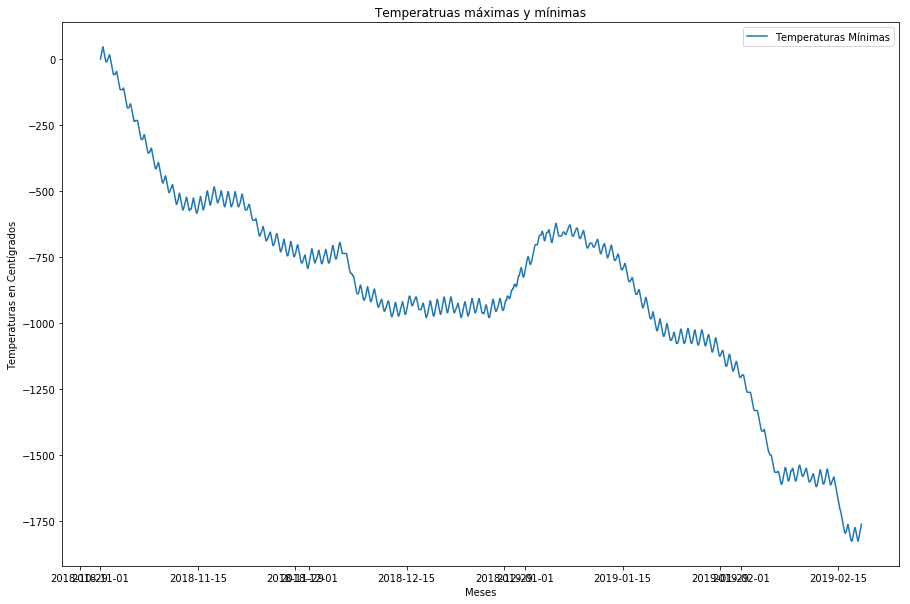

In [92]:
plt.figure(figsize=(15,10))

x = df.TIME
y = df.Acumulado


plt.plot(x, y, label='Temperaturas Mínimas')



plt.xlabel('Meses')
plt.ylabel('Temperaturas en Centígrados')

plt.title("Temperatruas máximas y mínimas")

plt.legend()

plt.show()